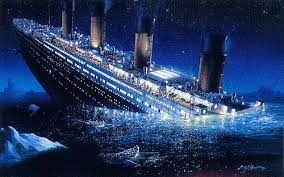 

The RMS Titanic's sinking is one of the most sophisticated shipwrecks in history. The Titanic sank on April 15, 1912, on his or her first voyage, after striking with an iceberg, claiming 1502 of the 2224 lives. One of the causes for the shipwreck's high death toll was a lack of lifeboats for the crew and passangers. Even though, there were some element of chance associated in escaping the sinking - particular categories of individuals, such as women, children, and the upper class - which were far more likely to spare their lives than others.

# Daniel Mendez
# Spring 2022 
# Midterm Project

**Data:**

The information for data has been divided into two categories:

The training set (train.csv) and test set (test.csv). The training set should be used to build its machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. The model will be based on “features” like passengers’ gender and class. We can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is our job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic

# By Using Polynomial Regression, we predicted a titanic survivability.
# Stage I: Data Exploration
**The meaning of variables** <br> **Obtain basic information of variables**
 
survival: Survival (zero means none, one means Yes) pc Ticket class one = 1st, two = 2nd, three = 3rd gender Gender Generation Generation for life expectancy<br> Sibsp: The Number of spouses(ses) and siblings(sbl) when boarding the Titanic. <br> aredr: The Number of children(dr) and parents(are) when boarding the Titanic <br> Ticket: Number of tickets <br> Fare: the fare of the passenger<br>Cabin: for a number of cabins, meaning room numbers on the titanic ship<br>embarked: Embarcation point (C means Cherbourg; Q means Queenstown; S means Southhampton)<br>Pclass: this is for the type of social classes of people and to estimate for socio-ecconomic status [SES] 1st means upper; 2nd means middle; 3rd means lower <br> Age:  If the age is predicted, it is in the configuration of xx.5 and if it is fewer than 1 then, the age is fractional in a consistent manner.<br>Sibsp: This is how the dataset identifies family relationships... Siblings include a brother, a stepbrother, a sister, and a stepsister. Spouses were defined wives and husbands (mistresses and fiancés were strongly disregarded) <br>Parch: This is how the dataset identifies family relationships... Mother and father refer to parents. Child refers to a daughter, son, stepdaughter, or stepson. Because some youngsters traveled exclusively with a babysitter, aredr=0 for them.<br>Embarked: embarked which means the final destination (for example Queenstown) <br> Survived: survived<br>ID number: PassengerId

In [1]:
# to Load the training dataset as a Pandas DataFrame. 
import numpy as my
import pandas as ds
import matplotlib.pyplot as plt
import seaborn as ebr
from sklearn.preprocessing import StandardScaler

# imporing packages for machine learning
import statsmodels.api as stsm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set up display area to show dataframe in jupyter qtconsole
ds.set_option('display.max_rows', 500)
ds.set_option('display.max_columns', 500)
ds.set_option('display.width', 1000)

In [2]:
def showLabels(ad, d=None):
    plt.margins(0.2, 0.2)
    rects = ad.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      
            (x_value, y_value),       
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     
                                        


In [3]:
# def plot_percentages(dataframe, var_list, sortbyindex=False):
## draw a graph of the  the percentage of passangers onboard on Titanic regardless of the different list of features
#    plt.figure(figsize=(20, 17))
#    for var in var_list:
#        plt.subplot(3,4,var_list.index(var)+1)
#        values = (dataframe[var].value_counts(normalize=True)*100)
#        if sortbyindex:
#                values = values.sort_index()
#        ad = values.plot.bar(color=ebr.color_palette('deep', 16))
#        ad.set_ylabel('% in dataset', sizeoffo=16)
#        ad.set_xlabel(var, sizeoffont=10)
#        showLabels(ad)

In [4]:
def plot_percentages(dataframe, by, sortbyindex=False):
    #plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ad = values.plot.bar(color=ebr.color_palette('deep',16))
    ad.set_ylabel('Number of dataset', fontsize=16)
    ad.set_xlabel(by, fontsize=12)
    showLabels(ad)
    #plt.subplot(1, 2, 2)
    group = dataframe.groupby(['Survived',by])[by].count()
    count = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = group.unstack() * 100 / count.T
    #print(percentages)
    ad = percentages.plot.bar(color=ebr.color_palette('deep', 16))
    ad.set_ylabel('The # of Survived', fontsize=16)
    showLabels(ad)
    #2 plots side by side 

In [5]:
# read the test data
testdf = ds.read_csv('test.csv')
# making the copy of the orignal test data
test = testdf[:] 
print('test set shape :{} '.format(test.shape))
# read the train data
train = ds.read_csv('train.csv')
print('train set shape :{} '.format(train.shape))
print('train set info :{} '.format(train.info()))
train.head()

test set shape :(418, 11) 
train set shape :(891, 12) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train set info :None 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Managing Values That Aren't There**<br>
We can see missing data for some features from the above.

In [7]:
missing_per = round(train.isnull().sum()/len(train)*100,2)
missing_per[missing_per != 0]

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

Out of the 891 train records, 20% have no age information for the passengers and 77% have missing cabin information. In addition, two records lack the Embarked port name.
Let's deal with these missing data points.

In [8]:
missing_count=train.isnull().sum()
missing_count[missing_count >0.0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
train[train.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Because neither of these people has siblings, spouses, parents, or children. We are unable to deduce the Port of Embarkation. We can now,

Use the mode of the Embarked port to fill in the missing value.
Take these two records out of the analysis and modeling.
Using the first option, enter the missing port of embarkation with the mode, i.e. S: 644.

In [10]:
train['Embarked'].fillna('S',inplace=True)
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Managing the Age That Aren't There** <br>

In [11]:
train[train.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [12]:
# total number of age of passangers
print('Total Age for passangers : {}'.format(train.Age.mean()))
# Mean age of passangers who survived vs the one who did not survived
train.groupby('Survived').Age.mean()


Total Age for passangers : 29.69911764705882


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

There are 125 entries that did not survive out of the 177 missing Age values. The average age of passengers is 29.69, while the average life span of those who survived(1) is 28.3 and the average age of those who did not survive is 30.62. One method is to substitute the null Ages with the average of the passengers. However, age might be a possible predictor of long - term, thus by replacing 20% of the information with mean values, we can add significant bais to the model. Another method of imputing is to develop a regression model to anticipate the missing ages of passengers. Ignore the following 177 records. This reduces the amount of the train data while avoiding bias. We will fill in the blanks with randomized numbers ranging from 1 to 10 standard deviations.

In [13]:
#to create a custom function that will replace missing
# data with random integer values within one two standard deviations
def imputeAge(df,cmn) :
    dataset = df[:]
    mean = df[cmn].mean()
    std = df[cmn].std()
    is_null = dataset[cmn].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = my.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset[cmn].copy()
    age_slice[my.isnan(age_slice)] = rand_age
    dataset[cmn] = age_slice
    df = df.dropna()
    dataset[cmn] = df[cmn].astype(int)
#train["Age"].isnull().sum()

    

In [14]:
imputeAge(train,'Age')
train["Age"].isnull().sum()

177

In [15]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Managing Cabin That Aren't There**<br>The Cabin value is absent in 70% of the data. Because the amount of incomplete information is so significant, we should disregard this characteristic by changing the unwanted column from evaluation.

In [16]:
train.drop('Cabin',axis=1,inplace=True)
# Check missing value
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
# In the continuous variables we are Checking for observation
num_train = train[['Age','Fare']]
# Checking observation at 25%, 50%, 75%, 90%, 95% and 99%
num_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
90%,50.000000,77.958300
95%,56.000000,112.079150
99%,65.870000,249.006220


- There is no observation for the age when passenger's Age are skyrocketing in a gradual way.
- We can observe that the fare increases considerably after the 99th percentile, from 211.33 to 247.52. This indicates that there are some outliers towards the far end of the Fare allocation. Because the model is sensitive to outliers, let's get rid of them.

In [18]:
#fareMean=train.Fare.mean() 
#fareSd=train.Fare.std()
#train = train[np.abs(train['Fare']-fareMean) <= (3*fareSd)]
#(4) Data clensing 
q = train["Fare"].quantile(0.99)
train = train[train['Fare'] < q]

In [19]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
train['Fare'].describe(percentiles=[.25, .5, .75, .90, .95, .99])


count    882.000000
mean      29.002508
std       36.569302
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
90%       73.500000
95%       93.500000
99%      211.337500
max      247.520800
Name: Fare, dtype: float64

# Data Analysis for the Data Correction/Exploratory

# Analysis for the Univariate 

**Highlight: IDNumber**


In [20]:
train.PassengerId.head()


0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [21]:
print(train.Survived.value_counts())
### Checking the Survival Rate
survival_rate = round((sum(train[train['Survived']==1]['Survived'])/len(train['Survived'].index))*100,2)
print('Survival Rate : {}'.format(survival_rate))

0    547
1    335
Name: Survived, dtype: int64
Survival Rate : 37.98


- We have 543 passengers who recovered and 348 passengers who did not survive in this training data.
- The overall survival rate of the training data is 37.66 percent.

**Highlight: Pclass**
This element informs us about the onboard passengers' Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd.

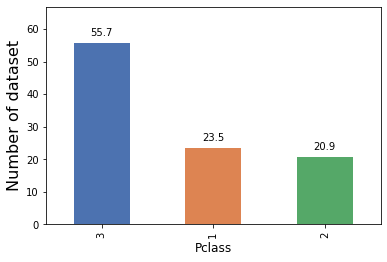

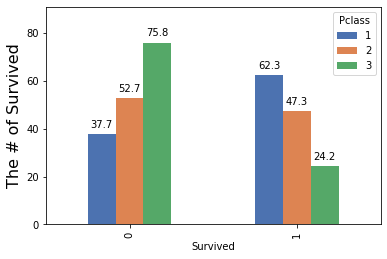

In [22]:
plot_percentages(train,'Pclass') ##showLabels(sns.countplot(train.pc))
plt.show()

**I decided to put these 2 graphs so that you can easily understand better** 

<img src="BarGraph.PNG"/>

<img src="TheBarGraph.PNG"/>

pc is of the int type, but the numbers it represents are of the hierarchical categorization for the type, dividing the passengers into the first, second, and third classes. Passengers in third class account for 55% of the total. While 24 percent go first class, 21 percent travel second class.
**Highlight: TitanicPassengerName**
This columns contain the names of all people aboard.

In [23]:
print('# of normal Passangers: {} '.format(len(train.Name.unique())))
train.Name.head()

# of normal Passangers: 882 


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Using Name as the main key. There are no two files in the data collection, and each passenger has a normal name..
We will utilize the Name characteristic to retrieve the Titles from the Names in order to create a new component.

In [24]:
train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()


Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [25]:
# This method produces a list of titles based on a 
# real name of the passenger.
# (6) (optional)
def extract_createTitles(df,columns):
    #This function returns the list of appellation from the passangers Name'''
    das = df
    #titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    # extract titles
    das['Ttle'] = das[columns].str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace appellation with a lot common appellation or as Rare
    das['Ttle'] = das['Ttle'].replace(['Mme', 'Ms','Capt', 'Mile','Sir', 'Dr',\
                                            'Major', 'Rev', 'Countess', 'Don', 'YesSir'], 'Rare')
    das['Ttle'] = das['Ttle'].replace('Col', 'Miss')
    das['Ttle'] = das['Ttle'].replace('Jonkheer', 'Miss')
    das['Ttle'] = das['Ttle'].replace('Lady', 'Mrs')
    return das['Ttle']
    # change titles into numbers
    # das = das['appellation'] = ds['appellation'].map(appellation)
    # to fill  NaN with 0, to get safe
    #das['appellation'] = das['appellation'].fillna(0)

In [26]:
train['Ttle'] = extract_createTitles(train,'Name')


In [27]:
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 882, dtype: int64

**Highlight: Gender**<br>
This column is about the gender of the passanger like female and male. 

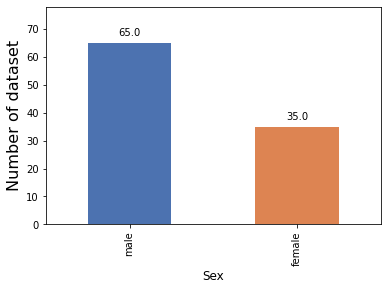

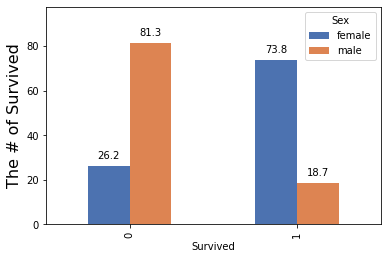

In [28]:
plot_percentages(train,'Sex')

- Male passengers, 65%,  outnumbered female passengers, 35%.
- Female survivors outnumbered male survivors by a wide margin. Females made up 74.2 percent of the survivors.
- This shows that females and children were told to go first.
- Men had a dismal chance of survival.

**Hightlight: Age** 

This column shows information about how old do the passenger be. 


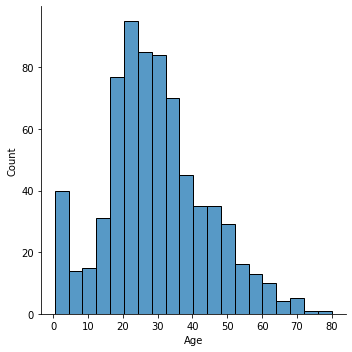

Total Number Age : 29.68818439716312


In [29]:
ebr.displot(train.Age)
plt.show()
print('Total Number Age : {}'.format(train.Age.mean()))

In [30]:
train.groupby('Survived').Age.mean()

Survived
0    30.574645
1    28.366325
Name: Age, dtype: float64

- Consequently, the mean lifespan of passengers onboard was 29.5 years old. 
- The total number of passengers who survived was 28.3 years old.
- the Standard deviation of passengers who did not survive was 30.26 years old.

In [31]:
ForBin = [0,10,20,30,40,50,60,70,my.inf]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
age_groups = ds.cut(train.Age, ForBin, labels=labels)
train['age_group'] = age_groups

In [32]:
#ForBin = [0, 12, 17, 60, np.inf]
#lbls = ['child', 'teenager', 'adult', 'elder']
#age_groups = pd.cut(train.Age, bins, labels=labels)
#train['age_group'] = age_group

In [ ]:
# Droping the orignal Age Column
#train.drop('AgeBin',axis=1,inplace=True)
# Prediction Power
plot_percentages(train,'age_group')

- The preponderance of passengers on board, 33.8 percent, are between the ages of 20 and 30.
- 59.5 percent of children under the age of ten were able to survive. This demonstrates that children were the first to be evacuated.

**Highlight: sblses**

This is how the dataset identifies family relationships... Siblings include a brother, a sister, a stepbrother, and a stepsister. Spouses were defined as husbands and wives (mistresses and fiancés were excluded).

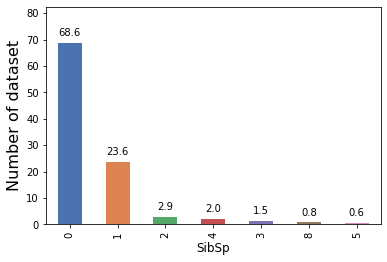

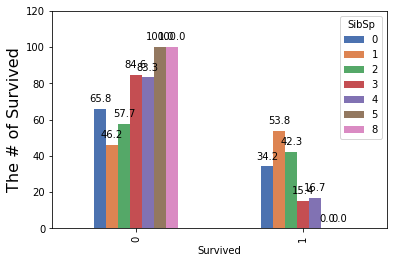

In [2059]:
plot_percentages(train,'SibSp')

- 68% percent of passengers had no siblings or spouses.
- Passengers with one sibling or one spouse had a better chance of surviving. 
- 53.6 percent of such passengers were rescued.

Highlight: aredr

This is how the dataset identifies family relationships... Mother and father = parents Child refers to a daughter, son, stepdaughter, or stepson. Because some youngsters traveled exclusively with a babysitter, aredr=0 for them.

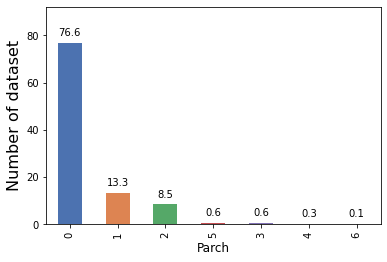

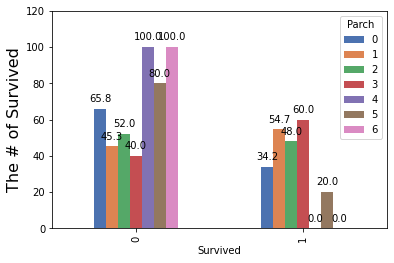

In [2060]:
plot_percentages(train,'Parch')

- There were no parents or children onboard for 76.1 percent of the passengers.
- If the proportion of parents/children onboard equals one, the overall survival of passengers is wonderful. 

In [2061]:
train.loc[(train['Parch'] == 0)  & (train['SibSp'] == 0)]['Survived']

2      1
4      0
5      0
6      0
11     1
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 535, dtype: int64

- Passengers' chances of survival are exceedingly low if they fly alone, that is, with no need for a sibling, spouse, parent, or child.

**Highlight: Boarding Pass**

Ticket Number

In [2062]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [2063]:
# Counting how manu boarding pass for ticket are there.
print('There are {} Unique Tickets values for the passangers'.format(len(train.Ticket.unique())))

There are 678 Unique Tickets values for the passangers


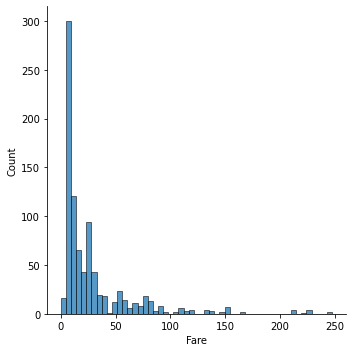

count    882.000000
mean      29.002508
std       36.569302
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      247.520800
Name: Fare, dtype: float64

In [2064]:
ebr.displot(train.Fare)
plt.show()
train.Fare.describe()

Fare is a variable that changes on a continuous basis. To make it easier to read, let's divide the price into distinct fare ranges or Bins.

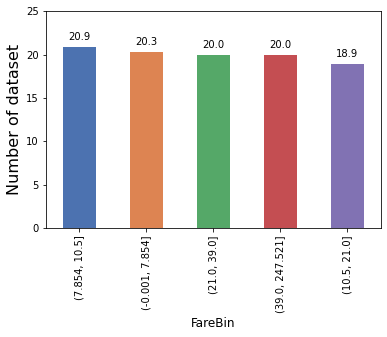

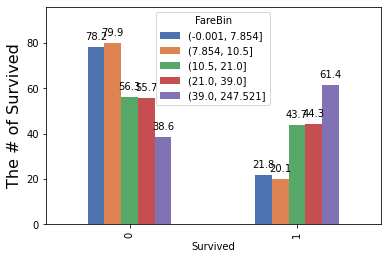

In [2065]:
# making  a new column to store the price range for each passanger
train['FareBin']=ds.qcut(train.Fare,q=5)
plot_percentages(train,'FareBin')

- It is possible that the fare has a positive link with the passenger's survival.
- As the fare increases, a passenger's odds of surviving improve.

**Highlight: Cabin**

- Passenger Cabin No. This column was removed from the study previously since 77 of any items were blank.

**Highlight: Embarked** <mp>
- Embarked: Passenger boarding point; C stands for Cherbourg, Q stands for Queenstown, and S stands for Southampton.



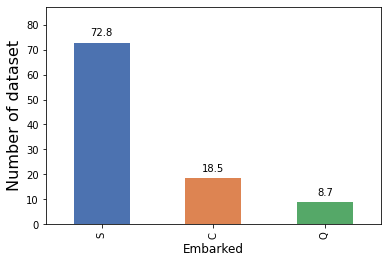

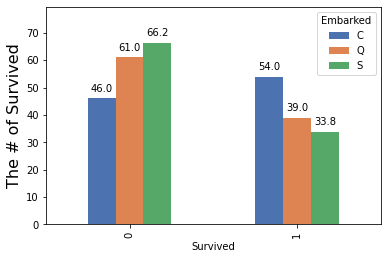

In [2066]:
plot_percentages(train,'Embarked')
# Model Construction 

- The majority of passengers, almost 72.5 percent, boarded at the Southampton port.
- the percentage of survival (%)
    * Passengers from Cherbourg survived in 55.4 percent of cases.
    * Passengers from Queenstown accounted for 39% of those who survived.
    * Passengers that embarked from Southhampton port survived in 33.9 percent of cases.

 # **Analysis for the Bivariate**
 
 **pc and gender** 


In [2067]:
train.groupby(['Pclass','Sex']).Survived.value_counts(normalize=False)


Pclass  Sex     Survived
1       female  1            86
                0             3
        male    0            75
                1            43
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

- We previously saw that the percentage of female survivors was far too high, at 74%.  
- The overwhelming of those who survived traveled in either first or second class.

**Age and Gender**

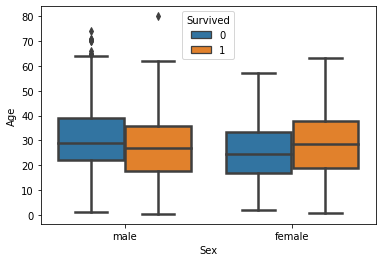

In [2068]:
ab = ebr.boxplot(x="Sex", y="Age", hue="Survived",data=train, linewidth=2.5)


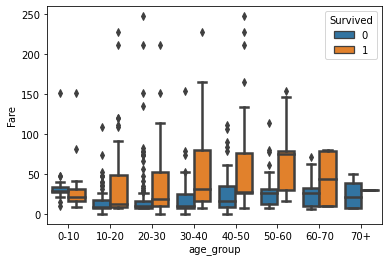

In [2069]:
ab = ebr.boxplot(x="age_group", y="Fare", hue="Survived",data=train, linewidth=2.5)


In [2070]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ttle,age_group,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20-30,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-40,"(39.0, 247.521]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20-30,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-40,"(39.0, 247.521]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-40,"(7.854, 10.5]"


**Getting rid of variable that are not related to the Predicting Survival of the Titanic**

In [2071]:
nonPredicter=['PassengerId','Name','Ticket']
train.drop(nonPredicter,axis=1,inplace=True)

**Working with Categorical Variables**

In [2072]:
genderdic={'male': 0 , 'female': 1}
train['Sex'] = train['Sex'].map(genderdic)

**Make artificial features (one-hot encoded) for categorical data with several levels**

In [2073]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ttle', 'age_group', 'FareBin'], dtype='object')

In [2074]:
dummy = ds.get_dummies(train[['Embarked','Ttle','age_group','FareBin']], drop_first=True)
# to include the final to the advanced dataframe
train = ds.concat([train, dummy], axis=1)


In [2075]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ttle,age_group,FareBin,Embarked_Q,Embarked_S,Ttle_Miss,Ttle_Mlle,Ttle_Mr,Ttle_Mrs,Ttle_Rare,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,22.0,1,0,7.2500,S,Mr,20-30,"(-0.001, 7.854]",0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,C,Mrs,30-40,"(39.0, 247.521]",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,Miss,20-30,"(7.854, 10.5]",0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,S,Mrs,30-40,"(39.0, 247.521]",0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,Mr,30-40,"(7.854, 10.5]",0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [2076]:
# We have already made dummies for the below variables, so we can leave them
train = train.drop(['Embarked','Ttle','age_group','FareBin'], axis=1)


**Highlight Scaling**

In [2077]:
X = train.drop('Survived',axis=1)
y = train['Survived']
# (2) Feature Scaling

In [2078]:
scaler = StandardScaler()
train[['Age','Fare']] = scaler.fit_transform(train[['Age','Fare']])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Ttle_Miss,Ttle_Mlle,Ttle_Mr,Ttle_Mrs,Ttle_Rare,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,-0.529232,1,0,-0.595167,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0.572161,1,0,1.156839,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,-0.253884,0,0,-0.576699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0.365650,1,0,0.659328,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,0.365650,0,0,-0.573279,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


**Seeing at the Correlation for the Matrix**

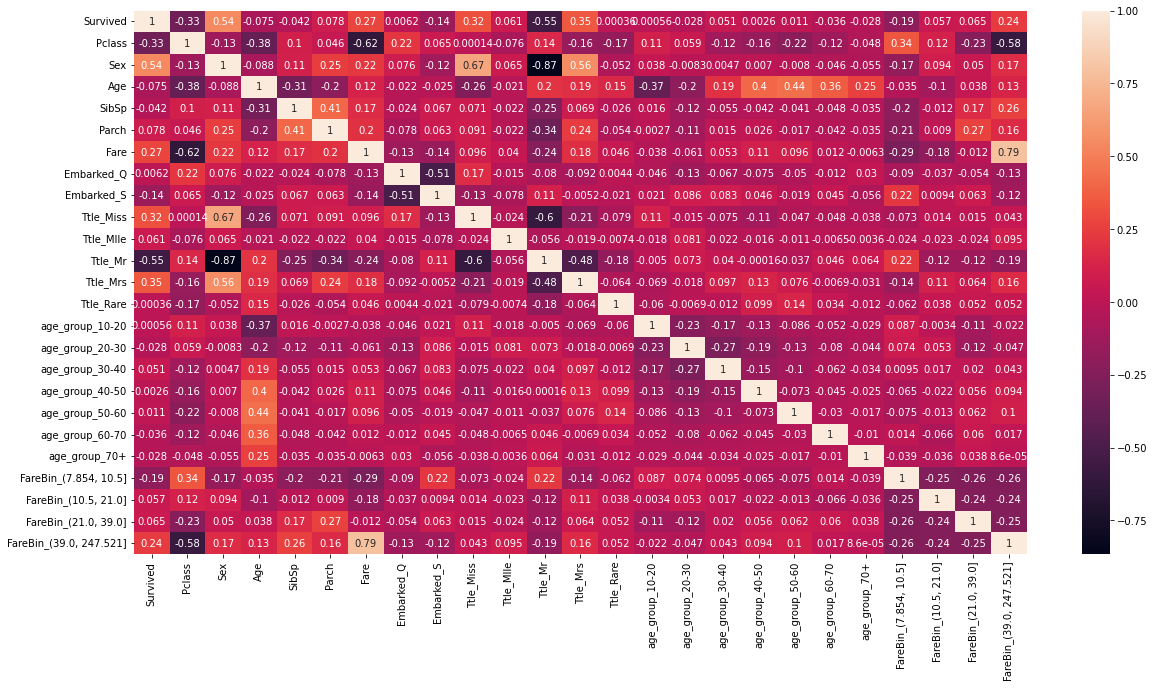

In [2079]:
# we'll show the correlation matrix 
plt.figure(figsize = (20,10))        # The Figure size
ebr.heatmap(train.corr(),annot = True)
plt.show()

- The correlation matrix above explicitly illustrates how each variable is connected to the others.
- This just indicates a possible relationship and does not imply causality.
- Title Miss and TitleMrs are closely connected to the feature Gender. 
- Let's leave the Title* out of the analysis because the gender of the passenger is a more easily understood predictor of survival.

# Model Building 


We will construct the model using a hybrid method. To arrive at the final model, a combination of computerized and human feature selection approaches were used.<br>
A critical step is to choose acceptable characteristics for prediction. It is critical that we evaluate predictors that have a significant impact on the prediction of the explanatory variables, in this example, the passenger's survival. <br> Let us utilize the **Polynomial Regression**, module from the sklearn package to course tune the model by picking the top ten features from the numerous attributes that most contribute or are determinants in predicting survival. <br>
Following Polynomial Regression, we will personally examine the characteristic relevance using statistical metrics such as Graph and so on, and further optimize the final model predictor variables. 

**Highlight Selection Using Polynomial Regression**
<br> Extract Validation set <br> (5) Building Models

In [2080]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Ttle_Miss,Ttle_Mlle,Ttle_Mr,Ttle_Mrs,Ttle_Rare,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,-0.529232,1,0,-0.595167,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0.572161,1,0,1.156839,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,-0.253884,0,0,-0.576699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0.365650,1,0,0.659328,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,0.365650,0,0,-0.573279,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


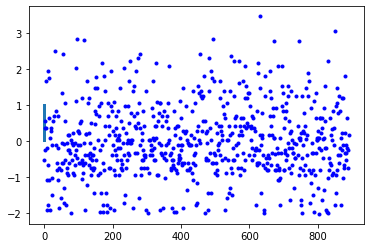

In [2081]:
plt.plot(train['Pclass'], train['Sex'], train['Age'], 'b.')

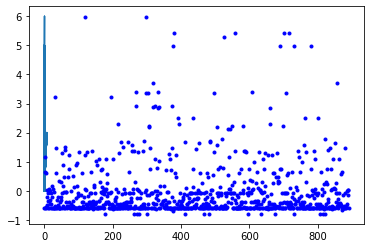

In [2082]:
plt.plot(train['SibSp'], train['Parch'], train['Fare'], 'b.')

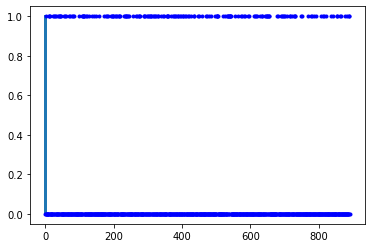

In [2083]:
plt.plot(train['Embarked_Q'], train['Embarked_S'], train['Ttle_Miss'], 'b.')

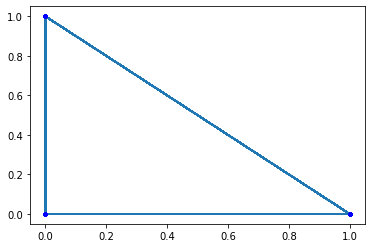

In [2084]:
plt.plot(train['age_group_10-20'], train['age_group_20-30'], train['age_group_30-40'], train['age_group_40-50'], 'b.')

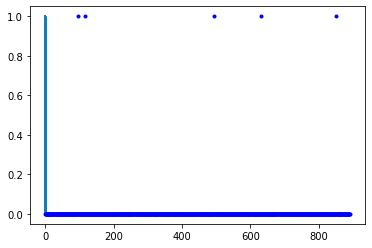

In [2085]:
plt.plot(train['age_group_50-60'], train['age_group_60-70'], train['age_group_70+'],  'b.')

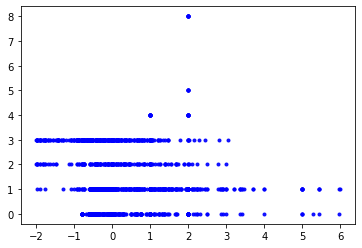

In [2086]:
 # We can observe from the graphic that the cases with salary > 250 follow a distinct pattern.
# Let's get rid of these instances.
data = train[train['Pclass'] < 250]
plt.plot(data['Age'], data['Pclass'], 'b.', alpha=0.9)

data = train[train['Sex'] < 250]
plt.plot(data['Fare'], data['Sex'], 'b.', alpha=0.9)

data = train[train['SibSp'] < 250]
plt.plot(data['Parch'], data['SibSp'], 'b.', alpha=0.9)

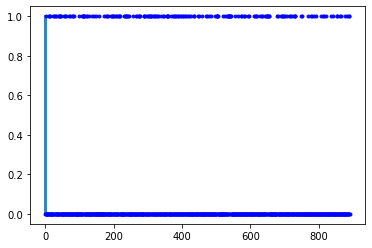

In [2087]:
data = train[train['Embarked_Q'] < 250]
plt.plot(data['Embarked_S'], data['Embarked_Q'], data['Ttle_Miss'], 'b.', alpha=0.9)


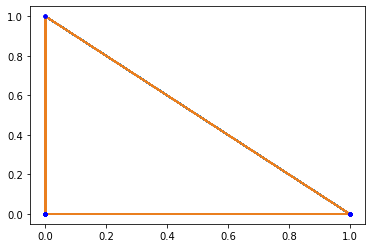

In [2088]:
data = train[train['age_group_10-20'] < 250]
plt.plot(data['age_group_20-30'], data['age_group_30-40'], data['age_group_40-50'], data['age_group_50-60'], data['age_group_60-70'],data['age_group_70+'], 'b.', alpha=0.9)

In [2089]:
from sklearn.model_selection import train_test_split #let disect the data of the titanic prediction 
data_train, data_test = train_test_split(data, test_size=0.2)
print(data_train.shape)
print(data_test.shape)


(705, 25)
(177, 25)


In [2090]:
# To characterize the link between Pclass, and Sex, use a linear regression model.
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data_train[['Pclass']], data_train['Sex'])

LinearRegression()

In [1938]:
print(model_lr.coef_)
print(model_lr.intercept_)

[-0.08043057]
0.5328579337708628


**Visualize the linear model**


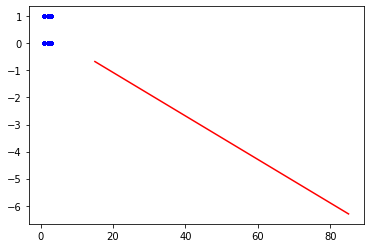

In [1939]:
plt.plot(data_train['Pclass'], data_train['Sex'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

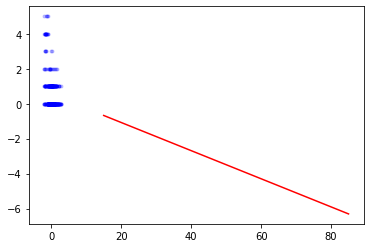

In [1940]:
plt.plot(data_train['Age'], data_train['SibSp'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

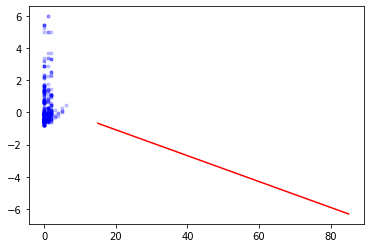

In [1941]:
plt.plot(data_train['Parch'], data_train['Fare'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

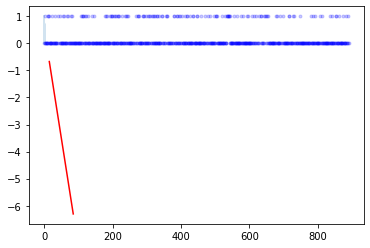

In [1942]:
plt.plot(data_train['Embarked_Q'], data_train['Embarked_S'], data_train['Ttle_Miss'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

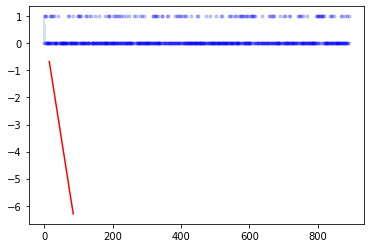

In [1943]:
plt.plot(data_train['age_group_10-20'], data_train['age_group_20-30'], data_train['age_group_30-40'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

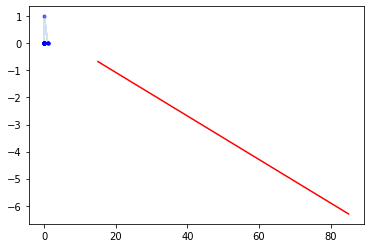

In [1944]:
plt.plot(data_train['age_group_40-50'], data_train['age_group_50-60'], data_train['age_group_60-70'], data_train['age_group_70+'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

**train a polynomial model instead.**

In [1945]:
model_pr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly_features.fit_transform(data_train[['Pclass']])
# print(age_poly)

model_pr.fit(age_poly, data_train['Sex'])


LinearRegression()

In [1946]:
print(model_pr.coef_)
print(model_pr.intercept_)

[ 0.1815902 -0.0640381]
0.31440055670825123


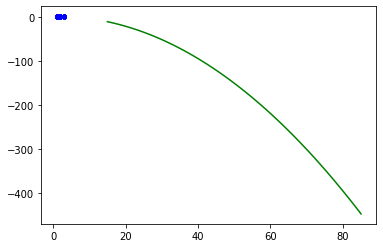

In [1947]:
plt.plot(data_train['Pclass'], data_train['Sex'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

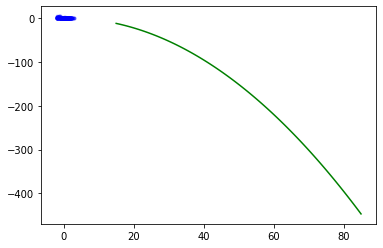

In [1948]:
plt.plot(data_train['Age'], data_train['SibSp'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

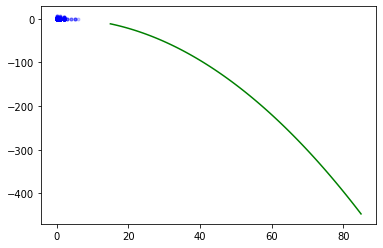

In [1949]:
plt.plot(data_train['Parch'], data_train['Fare'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

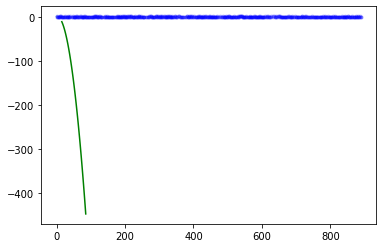

In [1950]:
plt.plot(data_train['Embarked_Q'], data_train['Embarked_S'], data_train['Ttle_Miss'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

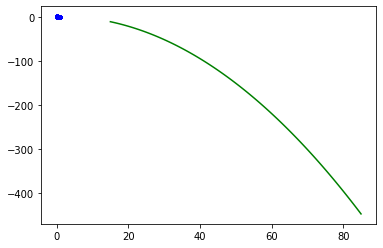

In [1951]:
plt.plot(data_train['age_group_10-20'], data_train['age_group_20-30'], data_train['age_group_30-40'], data_train['age_group_40-50'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

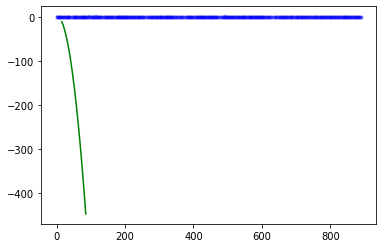

In [1952]:
plt.plot(data_train['age_group_50-60'], data_train['age_group_60-70'], data_train['age_group_70+'], 'b.', alpha=0.2)
x_coor = my.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

**train a k-nearest neighbors method**

In [1953]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Ttle_Miss,Ttle_Mlle,Ttle_Mr,Ttle_Mrs,Ttle_Rare,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,-0.529232,1,0,-0.595167,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0.572161,1,0,1.156839,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,-0.253884,0,0,-0.576699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0.365650,1,0,0.659328,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,0.365650,0,0,-0.573279,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0



Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked_Q	Embarked_S	Ttle_Miss	Ttle_Mlle	Ttle_Mr	Ttle_Mrs	Ttle_Rare	age_group_10-20	age_group_20-30	age_group_30-40	age_group_40-50	age_group_50-60	age_group_60-70	age_group_70+	FareBin_(7.854, 10.5]	FareBin_(10.5, 21.0]	FareBin_(21.0, 39.0]	FareBin_(39.0, 247.521] <br>
0	0	3	0	-0.529232	1	0	-0.595167	0	1	0	0	1	0	0	0	1	0	0	0	0	0	0	0	0	0 <br>
1	1	1	1	0.572161	1	0	1.156839	0	0	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	1<br>
2	1	3	1	-0.253884	0	0	-0.576699	0	1	1	0	0	0	0	0	1	0	0	0	0	0	1	0	0	0<br>
3	1	1	1	0.365650	1	0	0.659328	0	1	0	0	0	1	0	0	0	1	0	0	0	0	0	0	0	1<br>
4	0	3	0	0.365650	0	0	-0.573279	0	1	0	0	1	0	0	0	0	1	0	0	0	0	1	0	0	0<br>

<AxesSubplot:xlabel='Pclass'>

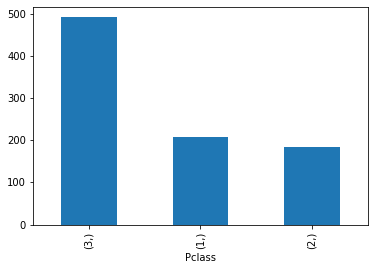

In [1954]:
train[['Survived']].value_counts()
train[['Pclass']].value_counts().plot.bar()

In [1955]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
input_cols = ['Survived', 'Pclass']
model_svm.fit(train[input_cols], train['Parch'])


LinearSVC()

In [1956]:
test_data = ds.DataFrame({
    'Age': [-5, 2, 0],
    'Fare': [6, 3, 2]
})
test_data

,Age,Fare
0,-5,6
1,2,3
2,0,2


In [1957]:
plot_data = ds.DataFrame(columns=['Age', 'Fare'])
x1_coordinates = my.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = my.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)

# Add the coordinates of these 10,000 points to plot_data
row_index = 0
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data.loc[row_index, :] = [x1, x2]
        row_index += 1

In [1958]:
plot_data.shape


(10000, 2)

In [1968]:
x1_data, x2_data = my.meshgrid(x1_coordinates, x2_coordinates) #cross validation for KNN 
print(x1_data[:5, :5])
# print(x1_data)
print(x2_data[:5, :5])

x1_data = my.array(x1_data).reshape([10000])
print(x1_data[:10])

x2_data = my.array(x2_data).reshape([10000])

plot_data = ds.DataFrame()
plot_data['Age'] = x1_data
plot_data['Fare'] = x2_data
plot_data

[[-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172]
 [-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172]
 [-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172]
 [-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172]
 [-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172]]
[[-2.         -2.         -2.         -2.         -2.        ]
 [-1.94949495 -1.94949495 -1.94949495 -1.94949495 -1.94949495]
 [-1.8989899  -1.8989899  -1.8989899  -1.8989899  -1.8989899 ]
 [-1.84848485 -1.84848485 -1.84848485 -1.84848485 -1.84848485]
 [-1.7979798  -1.7979798  -1.7979798  -1.7979798  -1.7979798 ]]
[-3.         -2.92929293 -2.85858586 -2.78787879 -2.71717172 -2.64646465
 -2.57575758 -2.50505051 -2.43434343 -2.36363636]


,Age,Fare
0,-3.000000,-2.0
1,-2.929293,-2.0
2,-2.858586,-2.0
3,-2.787879,-2.0
4,-2.717172,-2.0
...,...,...
9995,3.717172,3.0
9996,3.787879,3.0
9997,3.858586,3.0
9998,3.929293,3.0


In [1969]:
test_data['Correct?'] = (test_data['Fare'] == test_data['prediction'])
test_data.head()

,Age,Fare,prediction,Correct?
0,-5,6,1,False
1,2,3,0,False
2,0,2,0,False


In [1970]:
num_correct = test_data['Correct?'].sum()
print(num_correct)

0


In [1971]:
accuracy = num_correct / len(test_data)
print(accuracy)


0.0


In [1972]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data['Fare'], test_data['prediction'])
print(accuracy) # This is referred to as "training accuracy"

0.0


## Stage III: Model Selection and Interpretation
(1) Model Selection. <br> 
For each model you have trained, perform the following evaluations on the validation set:<br>
1. cross validation <br>
2. confusion matrix <br>
3. precision, and recall <br>
What is the best model?


In [1973]:
train.head() #cross validation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Ttle_Miss,Ttle_Mlle,Ttle_Mr,Ttle_Mrs,Ttle_Rare,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.0]","FareBin_(21.0, 39.0]","FareBin_(39.0, 247.521]"
0,0,3,0,-0.529232,1,0,-0.595167,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0.572161,1,0,1.156839,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,3,1,-0.253884,0,0,-0.576699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0.365650,1,0,0.659328,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,0,0.365650,0,0,-0.573279,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


**1. Cross Validation**

In [1974]:
Y = my.array(train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']])

In [1975]:
Y.shape

(882, 9)

In [1976]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_Test, = train_test_split(X, y, test_size = 0.20)
X_test.shape

(177, 24)

In [1977]:
print(my.mean(scores))

nan


In [1978]:
y_pred = my.zeros(10000)
y_test = my.zeros(10000)

indices1 = my.random.randint(0, 10000, 300)
indices2 = my.random.randint(0, 10000, 400)
indices3 = my.random.randint(0, 10000, 500)
y_pred[indices1] = 1
y_test[indices2] = 1
y_pred[indices3] = 1
y_test[indices3] = 1

In [1979]:
my.sum(y_test)

856.0

In [1980]:
my.sum(y_pred)

768.0

In [1981]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.9374


**2. confusion matrix**

In [1982]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8875,  269],
       [ 357,  499]], dtype=int64)

**3. precision, and recall**

In [1983]:
recall

array([1.        , 0.57373272, 0.        ])

In [1984]:
thresholds

array([0., 1.])

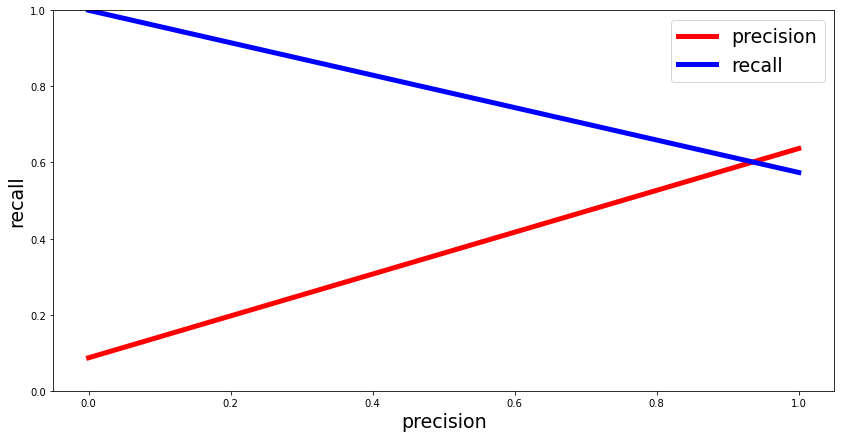

In [1985]:
#model interpretation, Precision Recall Curve 
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("precision", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylabel("recall", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, thresholds)
plt.show()


**Precision Recall Curve:** For each individual that the Random Forest method must classify, it computes a probability based on a function and identifies the person as having survived (when the score is greater than the threshold) or not having survived (when the score is smaller than the threshold). That is why the threshold is so crucial. As can be seen in the graph above, recall is progressively decreasing at an accuracy of roughly 85 percent. As a result, you may wish to choose the precision/recall tradeoff first — maybe at roughly 75%. <br>
- red line increases from 0.1 for recall to 0.65 while increading from 0 to 1 for threshold <br>
- blue line decreases from 1.0 to 0.6 for recall while increasing from 0 to 1.0 for threshold <br>
As can be seen in the graph above, recall is progressively decreasing at an accuracy of roughly 85 percent. As a result, you may wish to choose the precision/recall tradeoff first — maybe at roughly 75%.

You may now select a threshold that provides the greatest precision/recall tradeoff for your conventional machine learning issue. If you want, say, an accuracy of 80%, you can plainly see from the plots that a threshold of roughly 0.4 is required. Then you may train a model with that precise threshold and attain the necessary accuracy.

Another method is to plot precision and recall against one another:

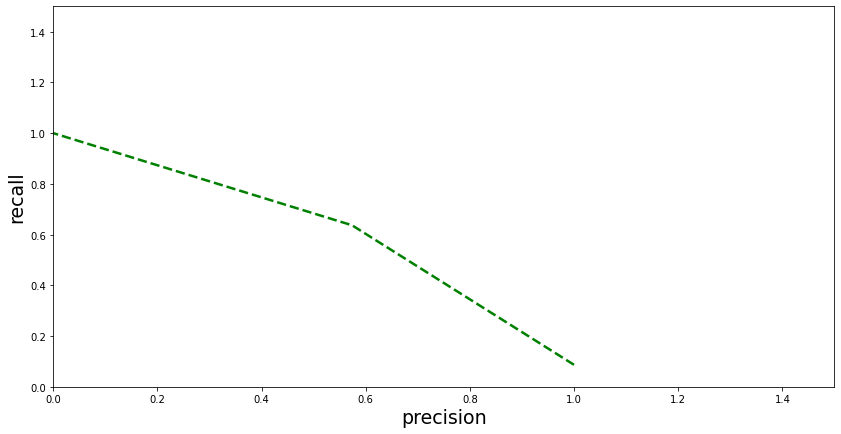

In [1986]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()


Precision (also known as positive predictive value) is the proportion of relevant examples found among the retrieved instances, whereas recall (also known as sensitivity) is the proportion of relevant instances found. Precision and recall are thus determined by relevance.

**What is the best model?**
The polynomial Regression is the best model considering that the Polynomial regression can help you lower the expenses that the cost function returns. It gives your regression line a curved form, making it more appropriate for your original dataset. You may more accurately fit your regression line to your data by using a greater degree polynomial.

**(3) (optional) Submit Results to Kaggle.com. Make predictions on the test set. Submit your results to Kaggle.com.**



In [1987]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1988]:
# to see for  any data that is not included on test set
missing_count=test.isnull().sum()
missing_count[missing_count >0.0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [1989]:
# put the missing Age with the imputeAge function that is define for the train set
imputeAge(test,'Age')
test["Age"].isnull().sum()

86

In [1990]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [1993]:
test.loc[test.Fare.isnull(),['Fare']] = train.Fare.mean()

In [1994]:
# creating age_group feature from the Age feature
ForBin = [0,10,20,30,40,50,60,70,my.inf]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
age_groups = ds.cut(train.Age, ForBin, labels=labels)
test['age_group'] = age_groups

In [1995]:
test['FareBin']=ds.qcut(test.Fare,q=5)

In [1996]:
test.drop(nonPredicter,axis=1,inplace=True) # not required for 

In [1997]:
test['Sex'] = test['Sex'].map(genderdic)

In [1999]:
X_test = test
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,age_group_10-20,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.796, 10.667]","FareBin_(10.667, 21.196]","FareBin_(21.196, 46.34]","FareBin_(46.34, 512.329]"
0,3,0,0.331232,0,0,-0.579320,1,0,0,0,0,0,0,0,0,1,0,0,0
1,3,1,1.191695,1,0,-0.602007,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0,2.224252,0,0,-0.528475,1,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,-0.185047,0,0,-0.556520,0,1,0,0,0,0,0,0,0,1,0,0,0
4,3,1,-0.529232,1,1,-0.457337,0,1,0,0,0,0,0,0,0,0,1,0,0


In [2000]:
data1 = ds.DataFrame({
    "Pclass": [3, 3, 2, 3, 3],
    "Sex": [0, 1, 0, 0, 1],
    "Age": [0.358068, 1.280034, 2.386393, 0.195111, 0.563898],
    "SibSp": [0, 1, 0, 0, 1],
    "Embarked_S": [0, 1, 0, 1, 1],
    "age_group_10-20": [0, 0, 0, 0, 0],
    "age_group_20-30": [0, 0, 0, 1, 1]
})
data1

,Pclass,Sex,Age,SibSp,Embarked_S,age_group_10-20,age_group_20-30
0,3,0,0.358068,0,0,0,0
1,3,1,1.280034,1,1,0,0
2,2,0,2.386393,0,0,0,0
3,3,0,0.195111,0,1,0,1
4,3,1,0.563898,1,1,0,1


**Making predictions on the test set**

In [2001]:
data2 = ds.DataFrame({
    "Survived": [0.157972, 0.384228, 0.118751, 0.079234, 0.526146],
})
data2

,Survived
0,0.157972
1,0.384228
2,0.118751
3,0.079234
4,0.526146


In [2011]:
y_test_df = ds.DataFrame(testdf[['PassengerId']])
y_test_df = ds.concat([y_test_df, data2],axis=1) #Establishing a new dataframe with the columns 'Survival prob' and 'Survived'

In [2012]:
y_test_df= y_test_df.rename(columns={ 0 : 'Survived'})
y_test_df.head() ## Appending data2 and y_pred_1

,PassengerId,Survived
0,892,0.157972
1,893,0.384228
2,894,0.118751
3,895,0.079234
4,896,0.526146


In [2013]:
y_test_df['Survived'] = y_test_df.Survived.map(lambda x: 1 if x > 0.35 else 0)
y_test_df.head() #Renaming the column 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [2014]:
print('Surival rate in the test data set: {}%'.format(round(y_test_df.Survived.sum()/len(y_test_df) *100,2)))

Surival rate in the test data set: 0.48%


Making the final submission file in the appropriate format, with two columns labeled 'PassangerId' and 'Survived.'

In [2015]:
y_test_df.to_csv('Titanic_submission.csv', index=False)
print('Submission CSV is ready!') #Convert the assignment dataframe to csv for submission to csv.
# for submission to Kaggle

Submission CSV is ready!


In [2016]:
submissions_check = ds.read_csv("Titanic_submission.csv")
submissions_check.head() #see the submission csv to make sure it's in the correct format

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<img src="KaggleCompetitonScores.PNG"/>